In [3]:
print(1)

1


In [4]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 3.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 3.2 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
     ---------------------------------------- 2.5/2.5 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:


import datetime
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

#from utils import tf_idf

In [10]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [11]:
INPUT_DATA_FOLDER = "final_data"

ISW_DATA_FILE = "all_isw.csv"
WEATHER_EVENTS_DATA_FILE = "all_hourly_weather_events.csv"

MODEL_FOLDER = "model"

tfidf_transformer_model = "tfidf_transformer"
count_vertorizer_model = "count_vectorizer"
alarm_classifier = "alarm_classifier"

tfidf_transformer_version = "v1"
count_vertorizer_version = "v1"
alarm_classifier_version = "v1"

In [12]:
def isNaN(num):
    return num != num

In [15]:
df_isw = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{ISW_DATA_FILE}", sep=";")

In [16]:
df_isw.head(5)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized,keywords,report_date,date_tomorrow_datetime
0,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\r\nRussian forces entered major Ukrainian cit...,\r\nrussian forces entered major ukrainian cit...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...",2022-02-25,2022-02-26
1,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\r\nRussian forces’ main axes of advance in th...,\r\nrussian forces’ main axes of advance in th...,russian forces’ main axes of advance in the l...,russian forces’ main axes of advance in the l...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...",2022-02-26,2022-02-27
2,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\r\nThe Russian military has likely recognized...,\r\nthe russian military has likely recognized...,the russian military has likely recognized th...,the russian military has likely recognized th...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...,"{'february': 0.496, 'seven': 0.349, 'twenty': ...",2022-02-27,2022-02-28
3,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.553, 'eight': 0.349, 'twenty': ...",2022-02-28,2022-03-01
4,5,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....",2022-03-01,2022-03-02


In [18]:
df_weather_events = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{WEATHER_EVENTS_DATA_FILE}", sep=";")

In [19]:
df_weather_events.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,00:00:00,1645653600,2.4,89.18,0.8,0.000,0.0,0.1,0.2,['snow'],31.3,15.5,275.6,1020.0,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,01:00:00,1645657200,2.4,87.90,0.6,0.000,0.0,0.0,0.2,['snow'],27.7,14.8,280.3,1021.0,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,02:00:00,1645660800,2.9,88.58,1.2,0.000,0.0,0.0,0.1,['snow'],29.2,14.4,310.0,1022.0,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,03:00:00,1645664400,2.3,86.63,0.3,0.000,0.0,0.0,0.1,['snow'],23.8,13.3,295.1,1021.0,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,04:00:00,1645668000,1.9,87.85,0.1,0.000,0.0,0.0,0.1,['snow'],24.5,13.3,305.8,1021.0,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,05:00:00,1645671600,1.9,91.66,0.6,0.000,0.0,0.0,0.1,NaN,23.4,10.8,296.0,1022.5,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,06:00:00,1645675200,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],20.9,10.8,300.0,1021.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,07:00:00,1645678800,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],19.1,10.8,300.0,1022.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,08:00:00,1645682400,1.8,91.32,0.6,0.118,100.0,0.0,0.1,['snow'],16.9,7.2,303.0,1024.2,4.4,100.0,NaN,NaN,NaN,10.0,"Snow, Overcast",Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [20]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-24")].index, inplace=True)

In [21]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-25")].index, inplace=True)

In [22]:
df_weather_events.sample(10).head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
34691,"Київ, Україна",2022-11-02,1667340000,12.4,3.4,7.7,2.7,71.1,0.100,4.17,73.8,6.5,3.0,06:50:02,16:32:11,0.25,12:00:00,1667383200,10.7,64.60,4.3,0.0,0.0,0.0,0.0,NaN,22.0,9.0,298.1,1015.0,24.1,37.4,320.0,1.2,3.0,10.0,Partially cloudy,Київ,Київська,Київ,Kyiv,Київщина,10,Київщина,Славутич,0.0,2022-11-02 09:53:48,2022-11-02 10:22:48,2022-11-02 10:22:48,NaN,2022-11-02 09:53:48,2022-11-02 10:22:48,2022-11-02 09:00:00,2022-11-02 11:00:00,2022-11-02,1.667380e+09,1.667387e+09,2022-11-02 10:00:00,1.667383e+09
184818,"Суми, Україна",2022-10-23,1666472400,28.8,6.9,9.2,6.5,85.3,0.594,8.33,4.3,0.2,0.0,07:16:59,17:32:32,0.91,21:00:00,1666548000,8.7,88.46,6.9,0.0,0.0,0.0,0.0,['rain'],19.8,7.2,220.0,1011.6,4.0,100.0,0.0,NaN,0.0,10.0,Overcast,Суми,Сумська,Суми,Sumy,Сумщина,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26925,"Київ, Україна",2022-03-16,1647381600,4.2,-4.2,-0.6,-8.5,57.4,0.000,0.00,195.3,17.0,5.0,06:09:54,18:04:11,0.45,21:00:00,1647457200,-1.9,60.18,-8.6,0.0,0.0,0.0,0.0,NaN,15.8,6.8,91.4,1035.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Київ,Київська,Київ,Kyiv,Київщина,10,Київщина,Київ,0.0,2022-03-16 17:47:25,2022-03-16 19:25:06,2022-03-16 19:25:06,NaN,2022-03-16 17:47:25,2022-03-16 19:25:06,2022-03-16 17:00:00,2022-03-16 20:00:00,2022-03-16,1.647450e+09,1.647461e+09,2022-03-16 19:00:00,1.647457e+09
169709,"Івано-Франківськ, Україна",2022-12-21,1671573600,2.4,-2.0,-0.3,-3.0,82.5,0.000,0.00,47.5,4.1,2.0,08:12:11,16:26:14,0.91,18:00:00,1671638400,0.9,76.86,-2.7,0.0,0.0,0.0,2.0,NaN,4.0,2.9,211.2,1018.0,24.1,82.9,0.0,NaN,0.0,10.0,Partially cloudy,Івано-Франківськ,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11702,"Кропивницький, Україна",2022-07-14,1657746000,26.6,14.8,19.8,12.7,66.9,4.000,4.17,246.7,21.4,8.0,05:03:49,20:49:18,0.50,04:00:00,1657760400,14.8,90.73,13.3,0.0,0.0,0.0,0.0,NaN,29.5,16.9,259.4,1010.0,24.1,85.7,0.0,NaN,0.0,10.0,Partially cloudy,Кропивницький,Кіровоградська,Кропивницький,Kropyvnytskyi,Кіровоградщина,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136073,"Житомир, Україна",2022-11-07,1667772000,9.7,5.2,7.2,5.6,89.6,1.100,25.00,54.6,4.7,3.0,07:05:23,16:31:58,0.42,04:00:00,1667786400,6.9,94.64,6.1,0.3,100.0,0.0,0.0,['rain'],19.1,10.1,157.6,1023.0,24.1,100.0,0.0,NaN,0.0,10.0,"Rain, Overcast",Житомир,Житомирська,Житомир,Zhytomyr,Житомирщина,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149271,"Полтава, Україна",2022-06-29,1656450000,30.1,19.6,24.4,16.6,64.6,0.000,0.00,321.5,27.9,9.0,04:37:38,20:52:43,0.99,23:00:00,1656532800,20.1,73.42,15.2,0.0,0.0,0.0,0.0,NaN,10.1,5.4,47.4,1017.0,23.7,90.2,0.0,NaN,0.0,3.0,Overcast,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42656,"Херсон, Україна",2022-10-22,1666386000,15.5,4.4,10.3,5.8,75.4,0.500,12.50,77.1,6.6,4.0,07:16:38,17:50:44,0.88,16:00:00,1666443600,14.7,57.11,6.3,0.0,0.0,0.0,0.0,NaN,33.5,17.3,199.0,1023.0,24.1,97.1,186.0,0.7,2.0,10.0,Overcast,Херсон,Херсонська,Херсон,Khers

In [23]:
df_isw_short = df_isw[["report_date", "date_tomorrow_datetime", "keywords", "text_main", "data_lemmatized",]]

In [24]:
df_isw_short = df_isw_short.copy().add_prefix('isw_')


In [25]:
df_isw_short.head(10)

,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized
0,2022-02-25,2022-02-26,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...","<div class=""field field-name-body field-type-t...",russian force entered major ukrainian cities—...
1,2022-02-26,2022-02-27,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...","<div class=""field field-name-body field-type-t...",russian force main ax advance last twenty fou...
2,2022-02-27,2022-02-28,"{'february': 0.496, 'seven': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military likely recognized initial ex...
3,2022-02-28,2022-03-01,"{'february': 0.553, 'eight': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military reorganizing military effort...
4,2022-03-01,2022-03-02,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....","<div class=""field field-name-body field-type-t...",russian force completing reinforcement resupp...
5,2022-03-02,2022-03-03,"{'march': 0.563, 'kyiv': 0.392, 'chernihiv': 0...","<div class=""field field-name-body field-type-t...",russian force resumed offensive operation sup...
6,2022-03-03,2022-03-04,"{'march': 0.591, 'eu': 0.179, 'foreign': 0.179...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
7,2022-03-04,2022-03-05,"{'march': 0.602, 'nato': 0.162, 'lukashenko': ...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
8,2022-03-05,2022-03-06,"{'reservist': 0.395, 'reserve': 0.269, 'conscr...","<div class=""field field-name-body field-type-t...",early announcement spring draft unlikely incr...
9,2022-03-06,2022-03-07,"{'march': 0.546, 'oil': 0.192, 'ceasefire': 0....","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...


In [ ]:
# df.dtypes

In [26]:
df = df_weather_events.merge(df_isw_short,
                            how = "left",
                            left_on = "day_datetime", 
                            right_on = "isw_date_tomorrow_datetime")

In [27]:
df.shape

(193980, 64)

In [28]:
len(df["city_resolvedAddress"].unique())

23

In [29]:
df["city_resolvedAddress"].unique()

array(['Луцьк, Луцький район, Україна', 'Кропивницький, Україна',
       'Дніпро, Україна', 'Київ, Україна', 'Херсон, Україна',
       'Чернівці, Україна', 'Чернігів, Україна', 'Одеса, Україна',
       'Миколаїв, Україна', 'Харків, Україна',
       'Хмельницька область, Україна', 'Донецьк, Україна',
       'Ужгород, Ужгородський район, Україна', 'Запоріжжя, Україна',
       'Рівне, Україна', 'Житомир, Україна', 'Тернопіль, Україна',
       'Полтава, Україна', 'Львів, Україна', 'Івано-Франківськ, Україна',
       'Черкаси, Україна', 'Суми, Україна', 'Вінниця, Україна'],
      dtype=object)

In [ ]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Луцьк, Луцький район, Україна"][47:49]

In [ ]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Кропивницький, Україна"][47:49]

In [ ]:
# df.sample(5).head(5)
 #df.loc[df["city_resolvedAddress"] == "Дніпро, Україна"][47:49]

In [ ]:

# df.loc[df["isw_date_tomorrow_datetime"] == "2022-02-25"]

In [30]:
df_work = df.assign(is_alarm=lambda x: x['event_day_date'].notnull().astype(int))

In [32]:
df_work.sample(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized,is_alarm
93690,"Хмельницька область, Україна",2022-10-09,1665262800,13.7,6.8,10.0,6.4,78.1,0.5,8.33,50.3,4.4,3.0,07:23:35,18:34:26,0.44,18:00:00,1665327600,12.4,67.72,6.6,0.0,0.0,0.0,0.0,NaN,28.8,18.0,320.0,1023.1,10.0,60.0,112.0,0.4,1.0,10.0,Partially cloudy,Хмельницький,Хмельницька,Хмельницький,Khmelnytskyi,Хмельниччина,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-08,2022-10-09,"{'october': 0.372, 'mobilization': 0.189, 'mod...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,0
944,"Луцьк, Луцький район, Україна",2022-04-03,1648933200,3.2,-1.3,0.6,-3.4,77.0,3.0,8.33,119.4,10.4,4.0,06:50:41,19:54:21,0.05,05:00:00,1648951200,-0.2,95.72,-0.8,0.0,0.0,0.1,0.3,['snow'],23.8,13.3,353.8,1004.0,0.1,97.8,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-02,2022-04-03,"{'april': 0.557, 'kyiv': 0.186, 'pause': 0.181...","<div class=""field field-name-body field-type-t...",continuing russian operation along new main e...,0
56752,"Чернігів, Україна",2022-08-03,1659474000,24.1,16.9,19.8,17.7,87.9,15.9,8.33,178.7,15.4,6.0,05:21:19,20:39:48,0.17,00:00:00,1659474000,18.2,88.11,16.2,0.0,0.0,0.0,0.0,NaN,28.1,10.8,360.0,1012.9,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,Чернігів,Чернігівська,Чернігів,Chernihiv,Чернігівщина,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,2022-08-03,"{'august': 0.339, 'butivka': 0.178, 'saratov':...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,0
85702,"Харків, Україна",2022-10-28,1666904400,8.0,3.0,5.8,4.5,91.7,0.0,0.00,48.0,4.1,2.0,07:17:43,17:19:15,0.08,01:00:00,1666908000,4.0,100.00,4.0,0.0,0.0,0.0,0.0,NaN,12.2,14.4,330.0,1023.0,5.0,100.0,0.0,NaN,0.0,10.0,Overcast,Харків,Харківська,Харків,Kharkiv,Харківщина,20,Харківщина,Харківська обл.,1.0,2022-10-27 21:40:07,2022-10-27 22:09:35,2022-10-27 22:09:35,NaN,2022-10-27 21:40:07,2022-10-27 22:09:35,2022-10-27 21:00:00,2022-10-27 23:00:00,2022-10-27,1.666904e+09,1.666912e+09,2022-10-27 22:00:00,1.666908e+09,2022-10-27,2022-10-28,"{'october': 0.356, 'seven': 0.214, 'twenty': 0...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,1
153610,"Львів, Україна",2022-03-03,1646258400,3.4,-0.9,0.7,-3.9,72.4,0.0,0.00,74.2,5.4,2.0,07:03:16,18:09:18,0.01,11:00:00,1646298000,1.7,70.45,-3.1,0.0,0.0,0.0,1.1,['snow'],24.5,14.4,320.0,1016.4,10.0,80.0,166.0,0.6,2.0,10.0,Partially cloudy,Львів,Львівська,Львів,Lviv,Львівщина,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-02,2022-03-03,"{'march': 0.563, 'kyiv': 0.392, 'chernihiv': 0...","<div class=""field field-name-body field-type-t...",russian force resumed offensive operation sup...,0


In [33]:
df.loc[1, "isw_data_lemmatized"]

' russian force entered major ukrainian cities—including kyiv kherson—for first time february twenty five russian force main ax advance focused kyiv successfully isolating city bank dnipro river russian military operation along ukraine northern border le well planned organized conducted emanating crimea also le successful far divergence performance likely arises part difference composition organization russian ground force element western military district belarus ukraine north southern military district black sea fleet south east isw previously observed determined well organized ukrainian resistance around kyiv kharkiv also played important role preventing russian military advancing speed success reportedly planned russian military deployed additional force southeastern belarus likely beyond moscow planned use ukraine offset problem challenge russian force remain much larger capable ukraine conventional military however russia likely defeat ukrainian regular military force secure terr

In [34]:
df_work.shape

(193980, 65)

<Axes: >

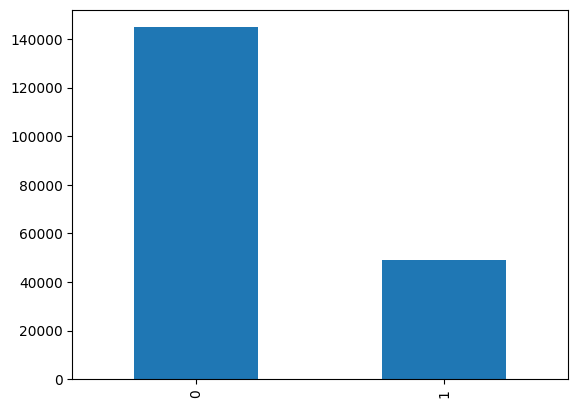

In [35]:
import matplotlib

df_work["is_alarm"].value_counts(dropna=False).plot(kind='bar')

In [ ]:
# df_work['isw_data_lemmatized'] = df_work['isw_data_lemmatized'].astype('string')

In [36]:
df_work['day_datetime'] = pd.to_datetime(df_work['day_datetime'])

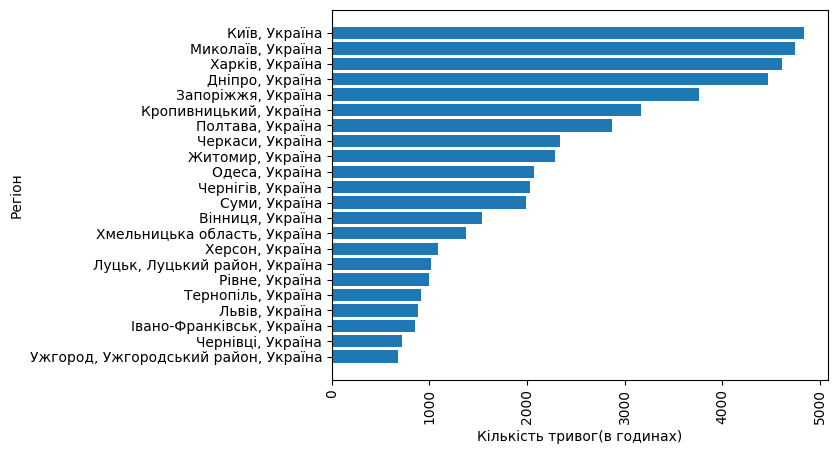

In [37]:
import matplotlib.pyplot as plt

df_filtered = df_work[df_work['is_alarm'] == 1]

result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

plt.barh(result.index, result.values)

plt.ylabel('Регіон')
plt.xlabel('Кількість тривог(в годинах)')

plt.xticks(rotation=90)

plt.show()

In [38]:
df_work.shape

(193980, 65)

In [ ]:
# df_quarter = df_work.iloc[::4]

In [ ]:
# df_quarter.shape

(48495, 65)

In [ ]:
# df_filtered = df_quarter[df_quarter['is_alarm'] == 1]

# result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

# plt.barh(result.index, result.values)

# plt.ylabel('Регіон')
# plt.xlabel('Кількість тривог(в годинах)')

# plt.xticks(rotation=90)

# plt.show()

In [39]:
new_dates = pd.date_range(start='2022-02-26', end='2023-01-20', freq='2D')
new_df = pd.DataFrame({'day_datetime': new_dates})

df_half = pd.merge(df_work, new_df, on='day_datetime')

In [40]:
df_half.shape

(97279, 65)

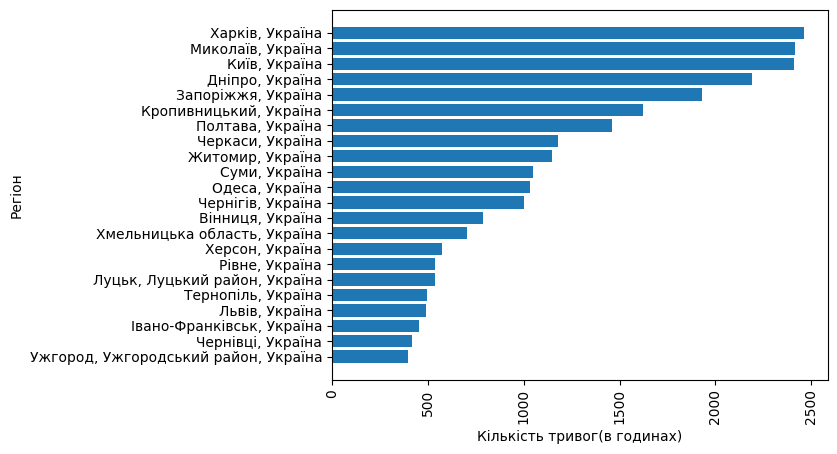

In [41]:
df_filtered = df_half[df_half['is_alarm'] == 1]

result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

plt.barh(result.index, result.values)

plt.ylabel('Регіон')
plt.xlabel('Кількість тривог(в годинах)')

plt.xticks(rotation=90)

plt.show()

In [42]:
df_work['day_of_week'] = df_work['day_datetime'].dt.day_name()
df_half['day_of_week'] = df_half['day_datetime'].dt.day_name()

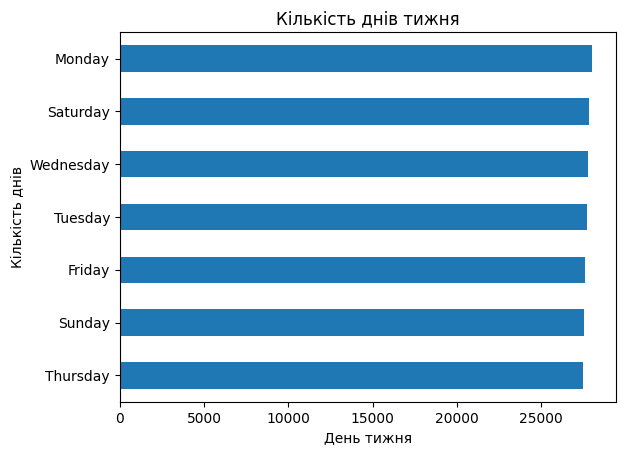

In [43]:
counts = df_work.groupby('day_of_week').size().sort_values()

counts.plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кiлькiсть днiв')
plt.title('Кількість днiв тижня')
plt.show()

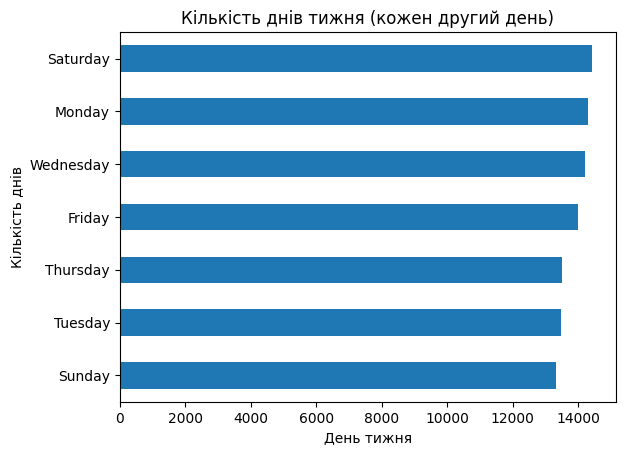

In [45]:
counts = df_half.groupby('day_of_week').size().sort_values()

counts.plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кiлькiсть днiв')
plt.title('Кількість днiв тижня (кожен другий день)')
plt.show()

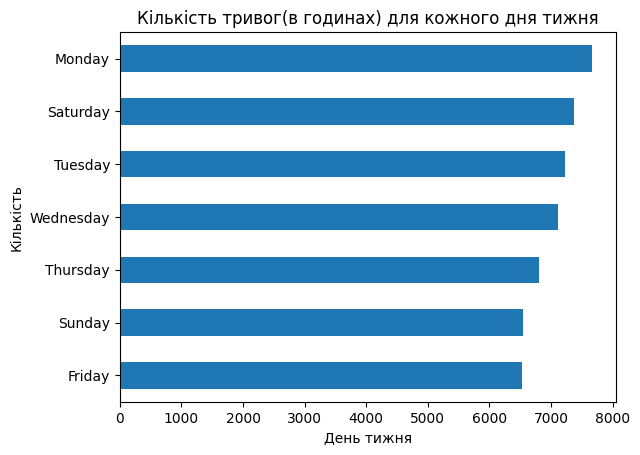

In [46]:
counts = df_work.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

counts[1].plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кількість')
plt.title('Кількість тривог(в годинах) для кожного дня тижня')
plt.show()

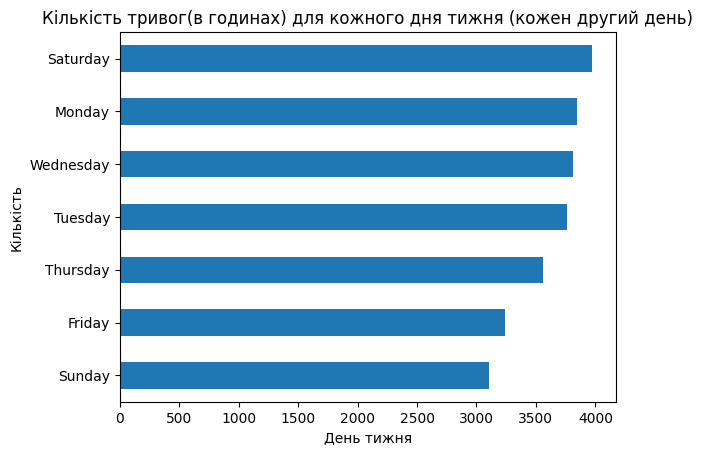

In [47]:
counts = df_half.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

counts[1].plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кількість')
plt.title('Кількість тривог(в годинах) для кожного дня тижня (кожен другий день)')
plt.show()

In [48]:
tfidf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))

# import dask.dataframe as dd

# dask_df = dd.from_pandas(df_work, npartitions=10)

cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vertorizer_model}_{count_vertorizer_version}.pkl", "rb"))

In [71]:
word_count_vector = cv.transform(df_half['isw_data_lemmatized'].values.astype('U'))


In [73]:
tfidf_vector = tfidf.transform(word_count_vector)

In [50]:
tfidf_vector = pickle.load(open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [51]:
tfidf_vector

<97279x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 62670145 stored elements in Compressed Sparse Row format>

In [75]:
with open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", 'wb') as handle:
    pickle.dump(tfidf_vector, handle)

In [52]:
fields_to_exlude = [
    "day_of_week",
    "city_resolvedAddress", 
    "day_datetime",
    "day_datetimeEpoch",
    "hour_datetime",
    "hour_datetimeEpoch",
    "city",
    "region",
    "center_city_ua",
    "center_city_en",
    "event_region_title",
    "event_region_city",
    "event_all_region",
    "event_clean_end",
    "event_intersection_alarm_id",
    "event_start_time",
    "event_end_time",
    "event_start_hour",
    "event_end_hour",
    "event_day_date",
    "event_start_hour_datetimeEpoch",
    "event_end_hour_datetimeEpoch",
    "event_hour_level_event_time",
    "event_hour_level_event_datetimeEpoch",
    "isw_report_date",
    "isw_date_tomorrow_datetime",
    "isw_text_main",
    "isw_keywords",
    "isw_data_lemmatized"
]

In [53]:
df_work_v2 = df_half.drop(fields_to_exlude, axis=1)

In [54]:
df_work_v2.head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id,event_start,event_end,is_alarm
0,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
1,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
2,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
3,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
4,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0


In [79]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn import preprocessing

In [56]:
REGIONS_DICTIONARY_FILE = f"data/weather_alarms_regions/regions.csv"
df_regions = pd.read_csv(REGIONS_DICTIONARY_FILE)

In [57]:
short_df_regions = df_regions[["region_alt", "region_id"]]
short_df_regions

,region_alt,region_id
0,Крим,1
1,Вінниччина,2
2,Волинь,3
3,Дніпропетровщина,4
4,Донеччина,5
5,Житомирщина,6
6,Закарпаття,7
7,Запоріжжя,8
8,Івано-Франківщина,9
9,Київщина,10


In [58]:
df_work_v2 = df_work_v2.merge(short_df_regions, 
                            how = "left",   
                            left_on = "region_alt", 
                            right_on = "region_alt")

In [59]:
df_work_v2["hour_conditions"] = df_work_v2["hour_conditions"].apply(lambda x: x.split(",")[0])

In [61]:
label_encoder = preprocessing.LabelEncoder()
df_work_v2["hour_conditions_id"] = label_encoder.fit_transform(df_work_v2["hour_conditions"])

In [62]:
with open(f"{MODEL_FOLDER}/weather_conditions_label_encoder.pkl", 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [63]:
df_work_v2.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id_x,event_start,event_end,is_alarm,region_id_y,hour_conditions_id
82149,6.9,3.4,5.1,3.3,88.5,0.4,16.67,13.4,1.1,1.0,07:17:30,16:12:51,0.17,6.3,90.12,4.8,0.0,0.0,0.0,0.0,NaN,34.9,16.6,73.8,1024.0,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,Одещина,15,NaN,NaN,0,15,3
35700,31.5,14.5,23.7,11.5,49.6,0.0,0.00,343.2,29.6,9.0,05:28:12,21:36:46,0.69,15.7,72.17,10.7,0.0,0.0,0.0,0.0,NaN,12.6,5.7,159.0,1012.8,40.0,0.1,80.0,0.3,1.0,10.0,Clear,Закарпаття,7,NaN,NaN,0,7,0
85721,11.1,9.2,9.8,7.6,86.1,5.8,45.83,18.3,1.5,2.0,07:18:15,15:46:45,0.58,9.9,81.04,6.8,0.2,100.0,0.0,0.0,['rain'],43.9,23.4,142.2,1005.0,24.1,100.0,0.0,NaN,0.0,10.0,Rain,Запоріжжя,8,2022-12-11 13:22:08,2022-12-11 14:20:12,1,8,5
41371,21.1,12.2,16.7,10.3,68.0,0.0,0.00,294.3,25.3,8.0,05:17:04,21:17:27,0.36,14.1,82.14,11.1,0.0,0.0,0.0,0.0,NaN,8.3,7.2,290.0,1013.3,10.0,60.0,0.0,NaN,0.0,10.0,Partially cloudy,Хмельниччина,22,NaN,NaN,0,22,4
52152,28.4,16.9,22.7,16.5,69.1,0.2,8.33,229.6,19.8,7.0,05:43:10,20:13:39,0.65,26.4,61.47,18.4,0.0,0.0,0.0,0.0,NaN,27.0,0.0,84.4,1010.2,10.0,80.0,280.0,1.0,3.0,10.0,Partially cloudy,Чернігівщина,25,NaN,NaN,0,25,4


In [64]:
tmp_fields_to_exlude = [
    "day_sunrise", 
    "day_sunset", 
    "hour_preciptype",
    "hour_conditions",
    "region_alt",
    "event_start",
    "event_end",
    "hour_solarenergy"
]

In [65]:
df_work_v3 = df_work_v2.drop(tmp_fields_to_exlude, axis=1)

In [66]:
df_work_v3.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
83047,0.2,-1.3,-0.4,-6.9,61.8,0.0,0.00,47.5,4.1,2.0,0.24,0.0,54.87,-8.0,0.0,0.0,0.0,0.0,26.6,14.8,77.0,1031.0,24.1,94.9,92.0,1.0,10.0,23,0,23,3
37160,27.2,16.7,21.7,15.7,70.5,0.4,4.17,244.1,21.2,8.0,0.89,27.2,53.35,16.9,0.0,0.0,0.0,0.0,27.4,18.0,30.0,1015.0,10.0,80.0,393.0,4.0,10.0,11,0,11,4
57972,19.9,13.0,16.3,6.7,54.9,0.0,0.00,247.8,21.5,8.0,0.32,14.8,63.75,8.0,0.0,0.0,0.0,0.0,20.2,10.1,357.8,1024.0,24.1,54.1,323.0,3.0,10.0,14,1,14,4
81359,4.9,2.9,3.7,2.7,93.1,5.0,45.83,7.3,0.5,0.0,0.03,3.6,91.86,2.4,0.3,100.0,0.0,0.0,20.2,11.9,1.5,1014.0,24.0,100.0,25.0,0.0,10.0,23,0,23,5
14128,18.7,7.2,12.8,4.8,60.0,0.0,0.00,174.1,15.0,6.0,0.19,9.0,76.55,5.1,0.0,0.0,0.0,0.0,14.4,8.6,182.1,1004.0,24.1,99.9,0.0,0.0,10.0,17,0,17,3


In [67]:
y =  df_work_v3["is_alarm"]
df_work_v4 = df_work_v3.drop(["is_alarm"], axis=1).fillna(method="ffill")

In [68]:
df_work_v4.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,region_id_y,hour_conditions_id
80341,4.4,-1.6,1.7,-0.4,86.3,0.7,16.67,70.2,6.0,3.0,0.96,3.1,87.33,1.2,0.2,100.0,0.0,0.3,24.8,14.4,91.7,1013.0,24.1,100.0,0.0,0.0,10.0,11,11,5
36716,26.7,14.8,21.3,10.8,53.6,0.0,0.00,328.7,28.5,9.0,0.82,26.6,36.21,10.4,0.0,0.0,0.0,0.0,40.7,19.8,31.9,1013.0,24.1,45.4,734.0,7.0,10.0,25,25,4
78546,6.3,3.0,4.2,3.8,97.1,0.0,0.00,71.0,6.2,3.0,0.69,4.1,98.61,3.9,0.0,0.0,0.0,0.0,6.1,3.6,214.7,1015.0,24.1,46.9,0.0,0.0,10.0,9,9,4
69223,13.0,3.3,7.6,2.3,71.2,0.0,0.00,144.2,12.3,5.0,0.61,4.5,79.71,1.3,0.0,0.0,0.0,0.0,6.1,3.6,52.0,1026.0,24.1,0.0,0.0,0.0,10.0,16,16,0
45807,31.6,14.9,23.1,11.5,51.3,0.0,0.00,318.2,27.7,9.0,0.90,19.6,61.83,12.1,0.0,0.0,0.0,0.0,10.8,0.4,330.0,1014.3,49.5,44.9,0.0,0.0,10.0,24,24,4


In [69]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

In [70]:
tfidf_vector.shape

(97279, 9002)

In [71]:
df_work_v4_csr = scipy.sparse.csr_matrix(df_work_v4.values)
df_all_features = sp.hstack((df_work_v4_csr, tfidf_vector), format='csr')

In [72]:
type(df_work_v4_csr)

scipy.sparse._csr.csr_matrix

In [73]:
df_work_v4_csr.shape

(97279, 30)

In [74]:
df_all_features.shape

(97279, 9032)

In [75]:
RANDOM_STATE = 1

X_train, X_test, y_train, y_test = train_test_split(df_all_features, y,
                                                    test_size = 0.20,
                                                    random_state = RANDOM_STATE,
                                                    shuffle=True
)

In [76]:
X_train.shape

(77823, 9032)

LogisticRegression

In [112]:
clf1 = LogisticRegression(random_state=RANDOM_STATE)
clf1.fit(X_train, y_train)

c:\Users\Anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [113]:
predicted = clf1.predict(X_test)
np.mean(predicted == y_test) 

0.7378700657894737

In [114]:
with open(f"{MODEL_FOLDER}/8_logistic_regression_v2.pkl", 'wb') as handle:
    pickle.dump(clf1, handle)

RandomForestClassifier

In [210]:
clf2 = RandomForestClassifier(random_state=RANDOM_STATE)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [211]:
predicted = clf2.predict(X_test)
np.mean(predicted == y_test) 

0.8734703301777881

In [213]:
alarm_classifier = "alarm_classifier"
alarm_classifier_version = "v1"

with open(f"{MODEL_FOLDER}/{alarm_classifier}_{alarm_classifier_version}.pkl", 'wb') as handle:
    pickle.dump(clf2, handle)

Support Vector Machines

In [214]:
from sklearn.svm import SVC

clf3 = SVC(random_state=RANDOM_STATE)
clf3.fit(X_train, y_train)

SVC(random_state=1)

In [215]:
predicted = clf3.predict(X_test)
np.mean(predicted == y_test) 

0.7343184791810975

In [216]:
with open(f"{MODEL_FOLDER}/{alarm_classifier}_v2.pkl", 'wb') as handle:
    pickle.dump(clf3, handle)